In [483]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from math import sqrt
from numpy import concatenate
from matplotlib import pyplot
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [484]:
#### Chargement du dataset de train et de test
train=pd.read_csv('application_record.csv')
train

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438552,6840104,M,N,Y,0,135000.0,Pensioner,Secondary / secondary special,Separated,House / apartment,-22717,365243,1,0,0,0,NaN,1.0
438553,6840222,F,N,N,0,103500.0,Working,Secondary / secondary special,Single / not married,House / apartment,-15939,-3007,1,0,0,0,Laborers,1.0
438554,6841878,F,N,N,0,54000.0,Commercial associate,Higher education,Single / not married,With parents,-8169,-372,1,1,0,0,Sales staff,1.0
438555,6842765,F,N,Y,0,72000.0,Pensioner,Secondary / secondary special,Married,House / apartment,-21673,365243,1,0,0,0,NaN,2.0


In [485]:
#Removing the coloums we dont need
train = train.drop(['NAME_HOUSING_TYPE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'NAME_EDUCATION_TYPE', 'OCCUPATION_TYPE', 'FLAG_OWN_REALTY'], axis=1)
train

,ID,CODE_GENDER,FLAG_OWN_CAR,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_FAMILY_STATUS,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS
0,5008804,M,Y,0,427500.0,Working,Civil marriage,1,1,0,0,2.0
1,5008805,M,Y,0,427500.0,Working,Civil marriage,1,1,0,0,2.0
2,5008806,M,Y,0,112500.0,Working,Married,1,0,0,0,2.0
3,5008808,F,N,0,270000.0,Commercial associate,Single / not married,1,0,1,1,1.0
4,5008809,F,N,0,270000.0,Commercial associate,Single / not married,1,0,1,1,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
438552,6840104,M,N,0,135000.0,Pensioner,Separated,1,0,0,0,1.0
438553,6840222,F,N,0,103500.0,Working,Single / not married,1,0,0,0,1.0
438554,6841878,F,N,0,54000.0,Commercial associate,Single / not married,1,1,0,0,1.0
438555,6842765,F,N,0,72000.0,Pensioner,Married,1,0,0,0,2.0


In [486]:
train.sample(5)

,ID,CODE_GENDER,FLAG_OWN_CAR,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_FAMILY_STATUS,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS
296006,6162549,M,Y,0,315000.0,Commercial associate,Single / not married,1,0,0,0,1.0
83617,5339899,F,Y,0,180000.0,Pensioner,Married,1,0,0,0,2.0
177175,5939506,F,Y,0,135000.0,Working,Married,1,0,0,1,2.0
354905,6472101,F,N,2,135000.0,Commercial associate,Married,1,1,1,0,4.0
300123,6193549,F,N,1,90000.0,Commercial associate,Separated,1,0,0,0,2.0


In [487]:
#Renamming our coloumns
train.rename(columns=lambda x: x.replace('CODE_GENDER', 'Sex'), inplace=True)
train.rename(columns=lambda x: x.replace('FLAG_OWN_CAR', 'Own a car'), inplace=True)
train.rename(columns=lambda x: x.replace('CNT_CHILDREN', 'No. of Children'), inplace=True)
train.rename(columns=lambda x: x.replace('AMT_INCOME_TOTAL', 'Total Income'), inplace=True)
train.rename(columns=lambda x: x.replace('NAME_INCOME_TYPE', 'Source of income'), inplace=True)
train.rename(columns=lambda x: x.replace('NAME_FAMILY_STATUS', 'Family Status'), inplace=True)
train.rename(columns=lambda x: x.replace('FLAG_MOBIL', 'Has Mobile'), inplace=True)
train.rename(columns=lambda x: x.replace('FLAG_WORK_PHONE', 'Has Work Phone'), inplace=True)
train.rename(columns=lambda x: x.replace('FLAG_PHONE', 'Has Phone'), inplace=True)
train.rename(columns=lambda x: x.replace('FLAG_EMAIL', 'Has Email'), inplace=True)
train.rename(columns=lambda x: x.replace('CNT_FAM_MEMBERS', 'Family Members'), inplace=True)

In [488]:
#Male is 0 female is 1
train['Sex']=train['Sex'].astype(str).map({'M':'0',"F":'1'})
train['Sex']

0         0
1         0
2         0
3         1
4         1
         ..
438552    0
438553    1
438554    1
438555    1
438556    1
Name: Sex, Length: 438557, dtype: object

In [489]:
#Own a car is 0 no is 1
train['Own a car']=train['Own a car'].astype(str).map({'Y':'0',"N":'1'})
train['Own a car']

0         0
1         0
2         0
3         1
4         1
         ..
438552    1
438553    1
438554    1
438555    1
438556    1
Name: Own a car, Length: 438557, dtype: object

In [490]:
#Changing the family status to 0,1,2,3
#Civil marriage or married will be married
train['Family Status']=train['Family Status'].astype(str).map({'Civil marriage':'0',"Married":'0',"Single / not married":'1',"Separated":'2',"Divorced":'3'})
train['Family Status']

0         0
1         0
2         0
3         1
4         1
         ..
438552    2
438553    1
438554    1
438555    0
438556    0
Name: Family Status, Length: 438557, dtype: object

In [491]:
#Changing the source of income to 0,1,2,3
train['Source of income']=train['Source of income'].astype(str).map({'Working':'0',"Commercial associate":'1',"Pensioner":'2'})
train['Source of income']

0         0
1         0
2         0
3         1
4         1
         ..
438552    2
438553    0
438554    1
438555    2
438556    0
Name: Source of income, Length: 438557, dtype: object

In [492]:
train

,ID,Sex,Own a car,No. of Children,Total Income,Source of income,Family Status,Has Mobile,Has Work Phone,Has Phone,Has Email,Family Members
0,5008804,0,0,0,427500.0,0,0,1,1,0,0,2.0
1,5008805,0,0,0,427500.0,0,0,1,1,0,0,2.0
2,5008806,0,0,0,112500.0,0,0,1,0,0,0,2.0
3,5008808,1,1,0,270000.0,1,1,1,0,1,1,1.0
4,5008809,1,1,0,270000.0,1,1,1,0,1,1,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
438552,6840104,0,1,0,135000.0,2,2,1,0,0,0,1.0
438553,6840222,1,1,0,103500.0,0,1,1,0,0,0,1.0
438554,6841878,1,1,0,54000.0,1,1,1,1,0,0,1.0
438555,6842765,1,1,0,72000.0,2,0,1,0,0,0,2.0


In [493]:
train['Sex'].value_counts()

1    294440
0    144117
Name: Sex, dtype: int64

In [494]:
train['Sex'].value_counts()*100/len(train)

1    67.138365
0    32.861635
Name: Sex, dtype: float64

In [495]:
# Analyse du dataset
train.describe(include="all")

,ID,Sex,Own a car,No. of Children,Total Income,Source of income,Family Status,Has Mobile,Has Work Phone,Has Phone,Has Email,Family Members
count,4.385570e+05,438557,438557,438557.000000,4.385570e+05,402354,418882,438557.0,438557.000000,438557.000000,438557.000000,438557.000000
unique,NaN,2,2,NaN,NaN,3,3,NaN,NaN,NaN,NaN,NaN
top,NaN,1,1,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN
freq,NaN,294440,275459,NaN,NaN,226104,336360,NaN,NaN,NaN,NaN,NaN
mean,6.022176e+06,NaN,NaN,0.427390,1.875243e+05,NaN,NaN,1.0,0.206133,0.287771,0.108207,2.194465
std,5.716370e+05,NaN,NaN,0.724882,1.100869e+05,NaN,NaN,0.0,0.404527,0.452724,0.310642,0.897207
min,5.008804e+06,NaN,NaN,0.000000,2.610000e+04,NaN,NaN,1.0,0.000000,0.000000,0.000000,1.000000
25%,5.609375e+06,NaN,NaN,0.000000,1.215000e+05,NaN,NaN,1.0,0.000000,0.000000,0.000000,2.000000
50%,6.047745e+06,NaN,NaN,0.000000,1.607805e+05,NaN,NaN,1.0,0.000000,0.000000,0.000000,2.000000
75%,6.456971e+06,NaN,NaN,1.000000,2.250000e+05,NaN,NaN,1.0,0.000000,1.000000,0.000000,3.000000


In [496]:
#Corrélation 
train.corr()

,ID,No. of Children,Total Income,Has Mobile,Has Work Phone,Has Phone,Has Email,Family Members
ID,1.000000,-0.005178,0.011179,NaN,-0.023319,-0.018992,0.032875,-0.001862
No. of Children,-0.005178,1.000000,0.019177,NaN,0.038418,-0.038266,0.028457,0.884781
Total Income,0.011179,0.019177,1.000000,NaN,-0.033635,0.004444,0.112139,0.011454
Has Mobile,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Has Work Phone,-0.023319,0.038418,-0.033635,NaN,1.000000,0.290066,-0.060915,0.049777
Has Phone,-0.018992,-0.038266,0.004444,NaN,0.290066,1.000000,-0.001170,-0.024213
Has Email,0.032875,0.028457,0.112139,NaN,-0.060915,-0.001170,1.000000,0.022054
Family Members,-0.001862,0.884781,0.011454,NaN,0.049777,-0.024213,0.022054,1.000000


In [497]:
train = train.drop(['Has Mobile'], axis=1)
train

,ID,Sex,Own a car,No. of Children,Total Income,Source of income,Family Status,Has Work Phone,Has Phone,Has Email,Family Members
0,5008804,0,0,0,427500.0,0,0,1,0,0,2.0
1,5008805,0,0,0,427500.0,0,0,1,0,0,2.0
2,5008806,0,0,0,112500.0,0,0,0,0,0,2.0
3,5008808,1,1,0,270000.0,1,1,0,1,1,1.0
4,5008809,1,1,0,270000.0,1,1,0,1,1,1.0
...,...,...,...,...,...,...,...,...,...,...,...
438552,6840104,0,1,0,135000.0,2,2,0,0,0,1.0
438553,6840222,1,1,0,103500.0,0,1,0,0,0,1.0
438554,6841878,1,1,0,54000.0,1,1,1,0,0,1.0
438555,6842765,1,1,0,72000.0,2,0,0,0,0,2.0


In [498]:
train.isna().sum()

ID                      0
Sex                     0
Own a car               0
No. of Children         0
Total Income            0
Source of income    36203
Family Status       19675
Has Work Phone          0
Has Phone               0
Has Email               0
Family Members          0
dtype: int64

In [499]:
train.dropna(inplace=True)

In [500]:
train.isna().sum()

ID                  0
Sex                 0
Own a car           0
No. of Children     0
Total Income        0
Source of income    0
Family Status       0
Has Work Phone      0
Has Phone           0
Has Email           0
Family Members      0
dtype: int64

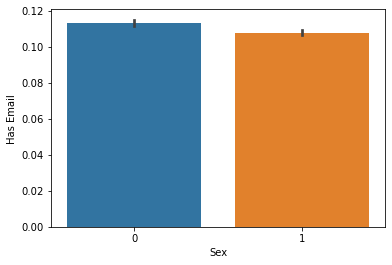

In [501]:
#impact of sex with email
sns.barplot(x="Sex", y="Has Email", data=train)

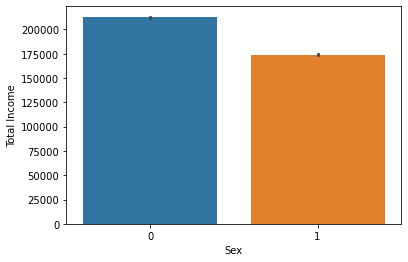

In [502]:
#impact of sex with income
sns.barplot(x="Sex", y="Total Income", data=train)

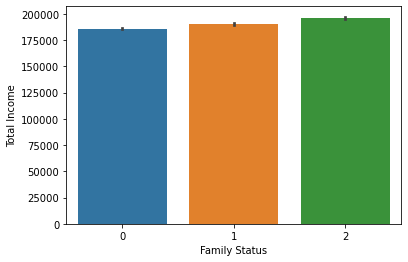

In [503]:
#impact of family status with income
sns.barplot(x="Family Status", y="Total Income", data=train)

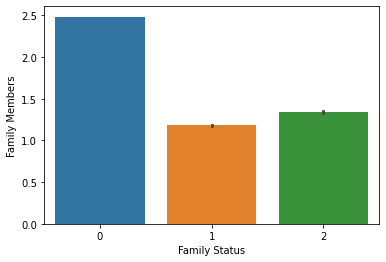

In [504]:
#impact of family members with family status
sns.barplot(x="Family Status", y="Family Members", data=train)

In [517]:
# Décomposition de l'échantillon
from sklearn.model_selection import train_test_split

predictors = train.drop(['Sex'], axis=1)

target = train["Sex"]

In [518]:
predictors.shape

(383643, 10)

In [519]:
x_train, x_val, y_train, y_val = train_test_split(predictors, target, test_size = 0.2, random_state = 0)

In [520]:
# Modélisation / Prédiction

# Gradient Boosting Classifier

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

cls=GradientBoostingClassifier().fit(x_train,y_train)

cls.score(x_val,y_val)

0.719349919847776

In [ ]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
cls=RandomForestClassifier(max_depth=12,n_estimators=300).fit(x_train,y_train)

cls.score(x_val,y_val)

In [ ]:
from sklearn.linear_model import LogisticRegression
cls=LogisticRegression(max_iter=200).fit(x_train,y_train)

cls.score(x_val,y_val)

In [ ]:
import pickle
# save the model to disk
filename = 'cls_accounts.pkl'
pickle.dump(cls, open(filename, 'wb'))

In [ ]:
x_val